# Web Scraping, Data Analysis and Visualization of Largest Companies by Revenue

In this project, we will scrape a list of the largest companies by revenue from Wikipedia, perform exploratory data analysis (EDA), and visualize the data.


## Introduction

In this notebook, we will be scraping, analyzing, and visualizing data from Wikipedia about the largest companies in the United States by revenue. Our goal is to gain insights into the distribution of companies across different industries, understand the relationships between revenue, profit, and number of employees, and build a predictive model to predict a company's profit based on its revenue.


In [112]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


## Web Scraping

Scraping the list of largest companies in the United States by revenue from Wikipedia.


In [113]:
# URL of the page
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

# Send a GET request to the server
response = requests.get(url)

# Parse HTML content
soup = BeautifulSoup(response.text, 'html.parser')


In [114]:
# Find the table and rows in the table.
table = soup.find('table', class_ = 'wikitable sortable')

world_titles = table.find_all('th')
world_table_titles = [title.text.strip() for title in world_titles]

print(world_table_titles)


['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [115]:
df = pd.DataFrame(columns = world_table_titles)
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [116]:
world_rows = table.find_all('tr')  # Finding all row elements in the table

# Iterating over rows and adding them to the DataFrame
for row in world_rows[1:]:  # Skipping the first row as it usually contains the header
    cells = row.find_all('td')  # Finding all cell elements in the row
    cell_values = [cell.text.strip() for cell in cells]  # Getting text content of each cell
    df.loc[len(df)] = cell_values  # Adding a new row to the DataFrame with cell values

print(df)


   Rank                      Name                    Industry  \
0     1                   Walmart                      Retail   
1     2                    Amazon  Retail and Cloud Computing   
2     3               Exxon Mobil          Petroleum industry   
3     4                     Apple        Electronics industry   
4     5        UnitedHealth Group                  Healthcare   
..  ...                       ...                         ...   
95   96                  Best Buy                      Retail   
96   97      Bristol-Myers Squibb     Pharmaceutical industry   
97   98           United Airlines                     Airline   
98   99  Thermo Fisher Scientific      Laboratory instruments   
99  100                  Qualcomm                  Technology   

   Revenue (USD millions) Revenue growth  Employees             Headquarters  
0                 611,289           6.7%  2,100,000    Bentonville, Arkansas  
1                 513,983           9.4%  1,540,000      Seat

## Save to CSV

Storing the scraped data into a CSV file.


In [117]:
# Write to CSV file
df.to_csv('largest_companies_by_revenue.csv', index=False, encoding='utf-8')



In [118]:
# Load Data
data = pd.read_csv('largest_companies_by_revenue.csv')

# Display Summary Statistics
print(data.describe())


             Rank
count  100.000000
mean    50.500000
std     29.011492
min      1.000000
25%     25.750000
50%     50.500000
75%     75.250000
max    100.000000


## Load and Explore Data

Loading the scraped data and performing basic exploratory data analysis.


In [119]:
# Load Data
data = pd.read_csv('largest_companies_by_revenue.csv')
print(data.head)


<bound method NDFrame.head of     Rank                      Name                    Industry  \
0      1                   Walmart                      Retail   
1      2                    Amazon  Retail and Cloud Computing   
2      3               Exxon Mobil          Petroleum industry   
3      4                     Apple        Electronics industry   
4      5        UnitedHealth Group                  Healthcare   
..   ...                       ...                         ...   
95    96                  Best Buy                      Retail   
96    97      Bristol-Myers Squibb     Pharmaceutical industry   
97    98           United Airlines                     Airline   
98    99  Thermo Fisher Scientific      Laboratory instruments   
99   100                  Qualcomm                  Technology   

   Revenue (USD millions) Revenue growth  Employees             Headquarters  
0                 611,289           6.7%  2,100,000    Bentonville, Arkansas  
1                 5

## Data Cleaning



In [121]:
# Checking for missing values

print(data.isnull().sum())

Rank                      0
Name                      0
Industry                  0
Revenue (USD millions)    0
Revenue growth            0
Employees                 0
Headquarters              0
dtype: int64


In [122]:
data['Revenue growth'] = data['Revenue growth'].str.rstrip('%').astype('float') / 100.0

# Remove non-numeric characters and convert to float
data['Revenue (USD millions)'] = pd.to_numeric(data['Revenue (USD millions)'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with null values in 'Revenue (USD millions)'
data.dropna(subset=['Revenue (USD millions)'], inplace=True)


## Visualization

Visualizing the distribution of companies across different industries and the relationships between revenue, profit, and number of employees.


**1. Correlation Heatmap**

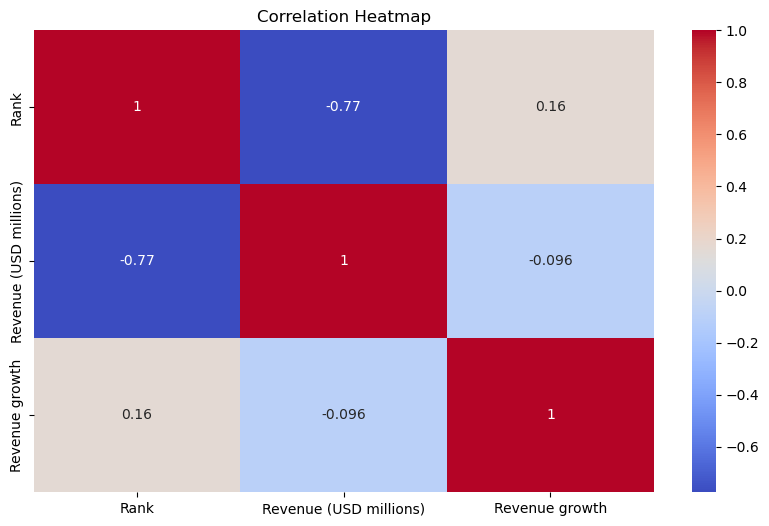

In [81]:
plt.figure(figsize=(10,6))
corr = data[['Rank', 'Revenue (USD millions)', 'Revenue growth', 'Employees']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


the correlation coefficient of 0.16 between Revenue growth and Rank in the correlation heatmap, it suggests a very weak positive linear relationship between the two variables. Even if the correlation is weak, it does not imply that there is no relationship at all between the two variables; there could be a non-linear relationship that the correlation coefficient does not capture.


**2. Distribution of companies across different industries**

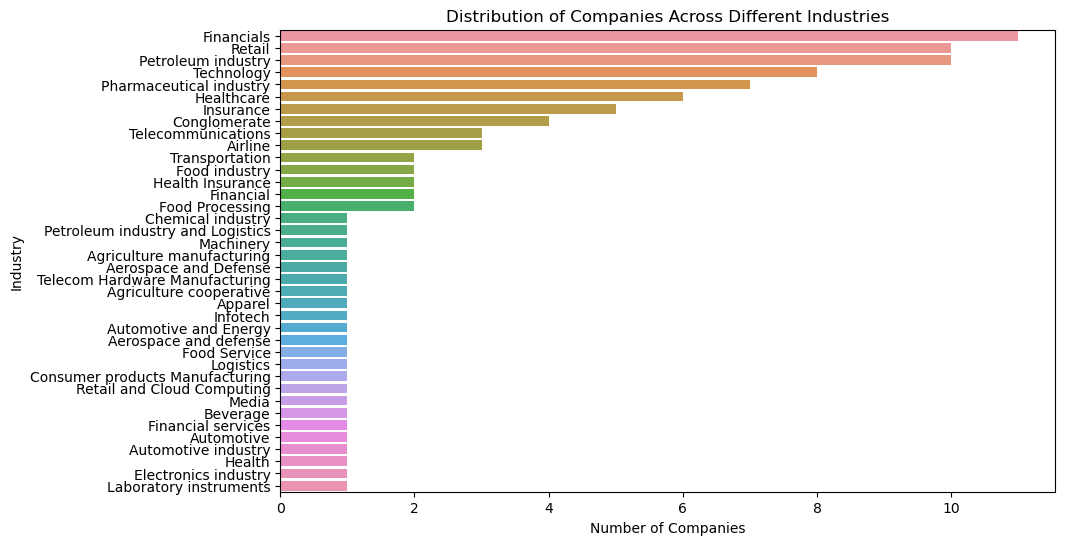

In [46]:

plt.figure(figsize=(10,6))
sns.countplot(y='Industry', data=data, order = data['Industry'].value_counts().index)
plt.title('Distribution of Companies Across Different Industries')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()



**3. Box Plot**

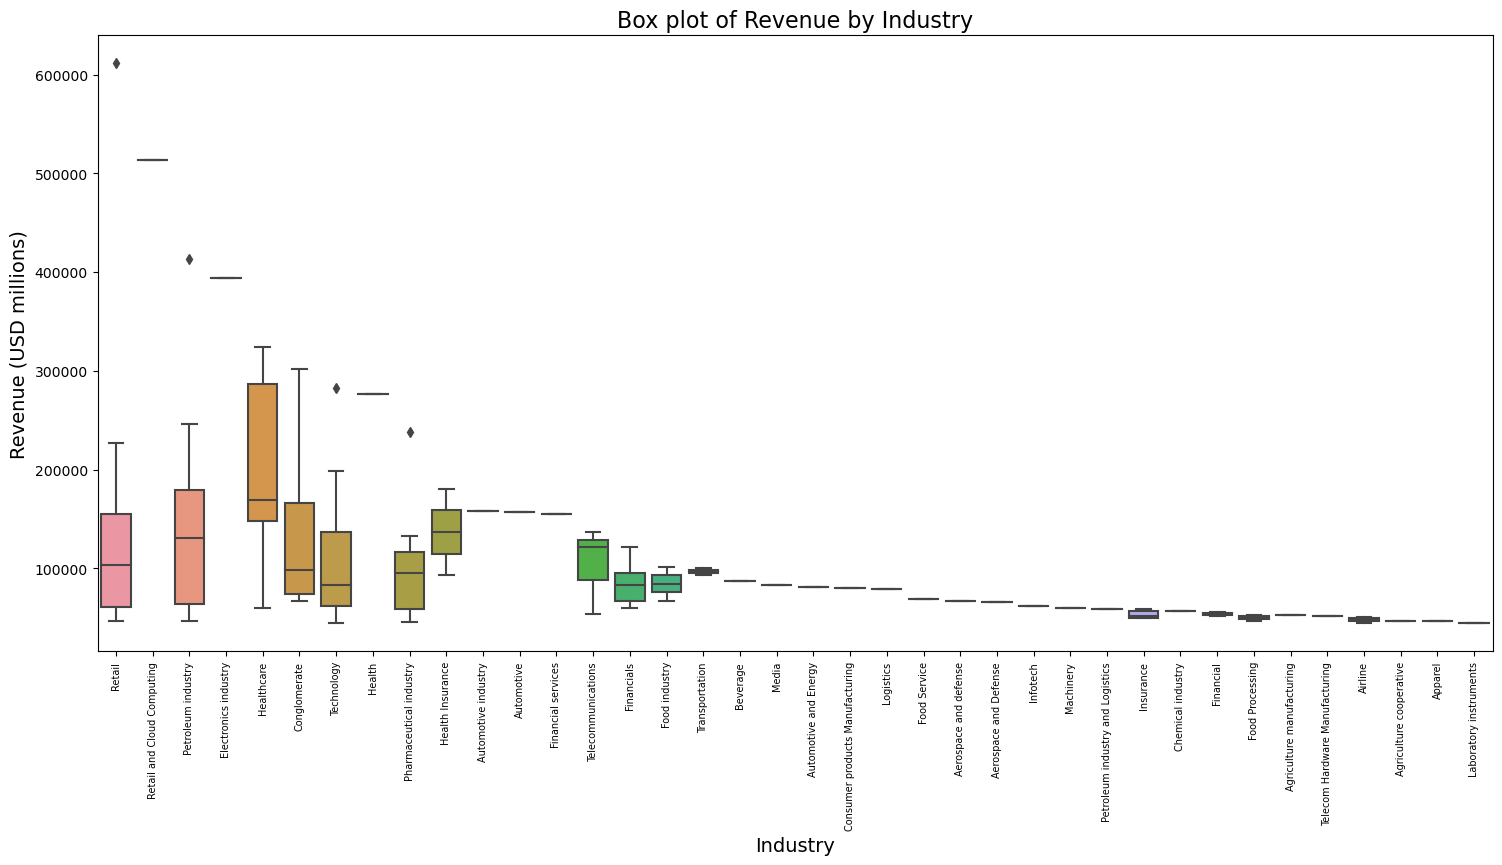

In [70]:
# Remove non-numeric characters and convert to float
data['Revenue (USD millions)'] = pd.to_numeric(data['Revenue (USD millions)'].replace('[\$,]', '', regex=True), errors='coerce')

# Drop rows with null values in 'Revenue (USD millions)'
data.dropna(subset=['Revenue (USD millions)'], inplace=True)


plt.figure(figsize=(18,8))
sns.boxplot(x='Industry', y='Revenue (USD millions)', data=data)
plt.xticks(rotation=90, fontsize=7)  # You can adjust the fontsize here
plt.yticks(fontsize=10)  # And here
plt.title('Box plot of Revenue by Industry', fontsize=16)  # And here
plt.xlabel('Industry', fontsize=14)  # And here
plt.ylabel('Revenue (USD millions)', fontsize=14)  # And here
plt.show()



**4. Histogram**

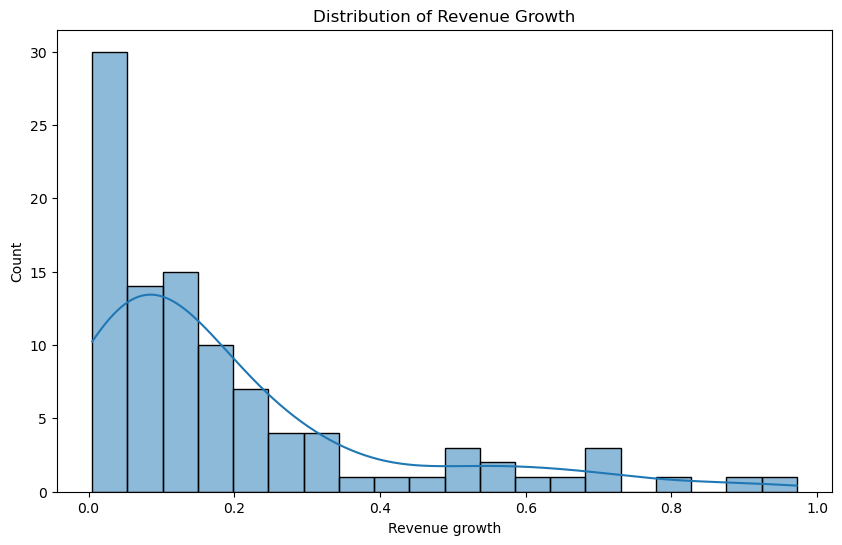

In [79]:
plt.figure(figsize=(10,6))
sns.histplot(data['Revenue growth'], bins=20, kde=True)
plt.title('Distribution of Revenue Growth')
plt.show()



**5. Bar Plot**

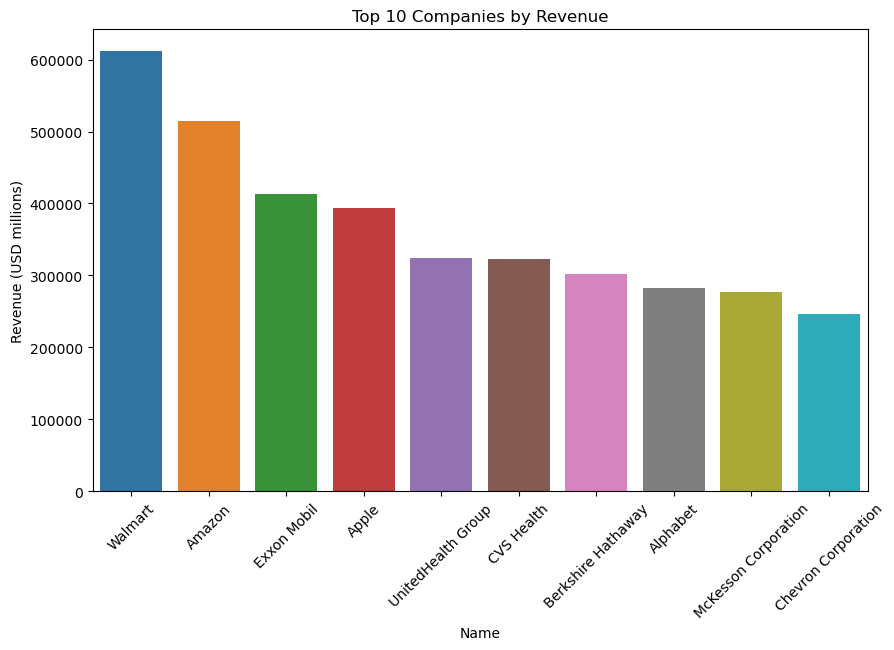

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Revenue (USD millions)', data=data.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Companies by Revenue')
plt.show()



**6. Scatter Plot**

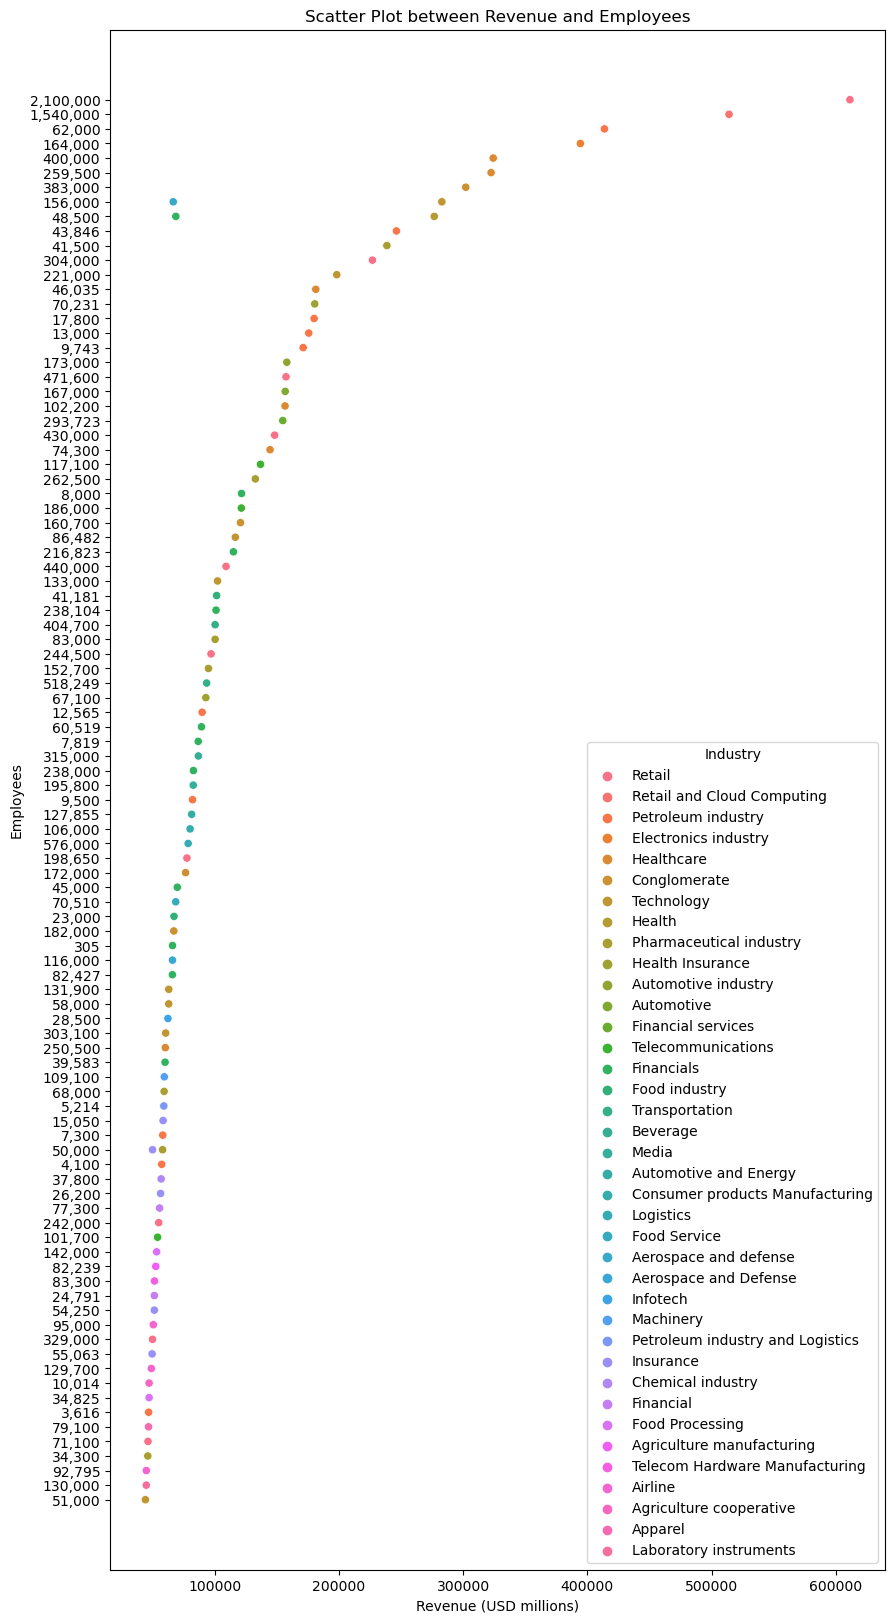

In [84]:
plt.figure(figsize=(10,20))
sns.scatterplot(x='Revenue (USD millions)', y='Employees', data=data, hue='Industry')
plt.title('Scatter Plot between Revenue and Employees')
plt.show()


**7. Pie Chart**

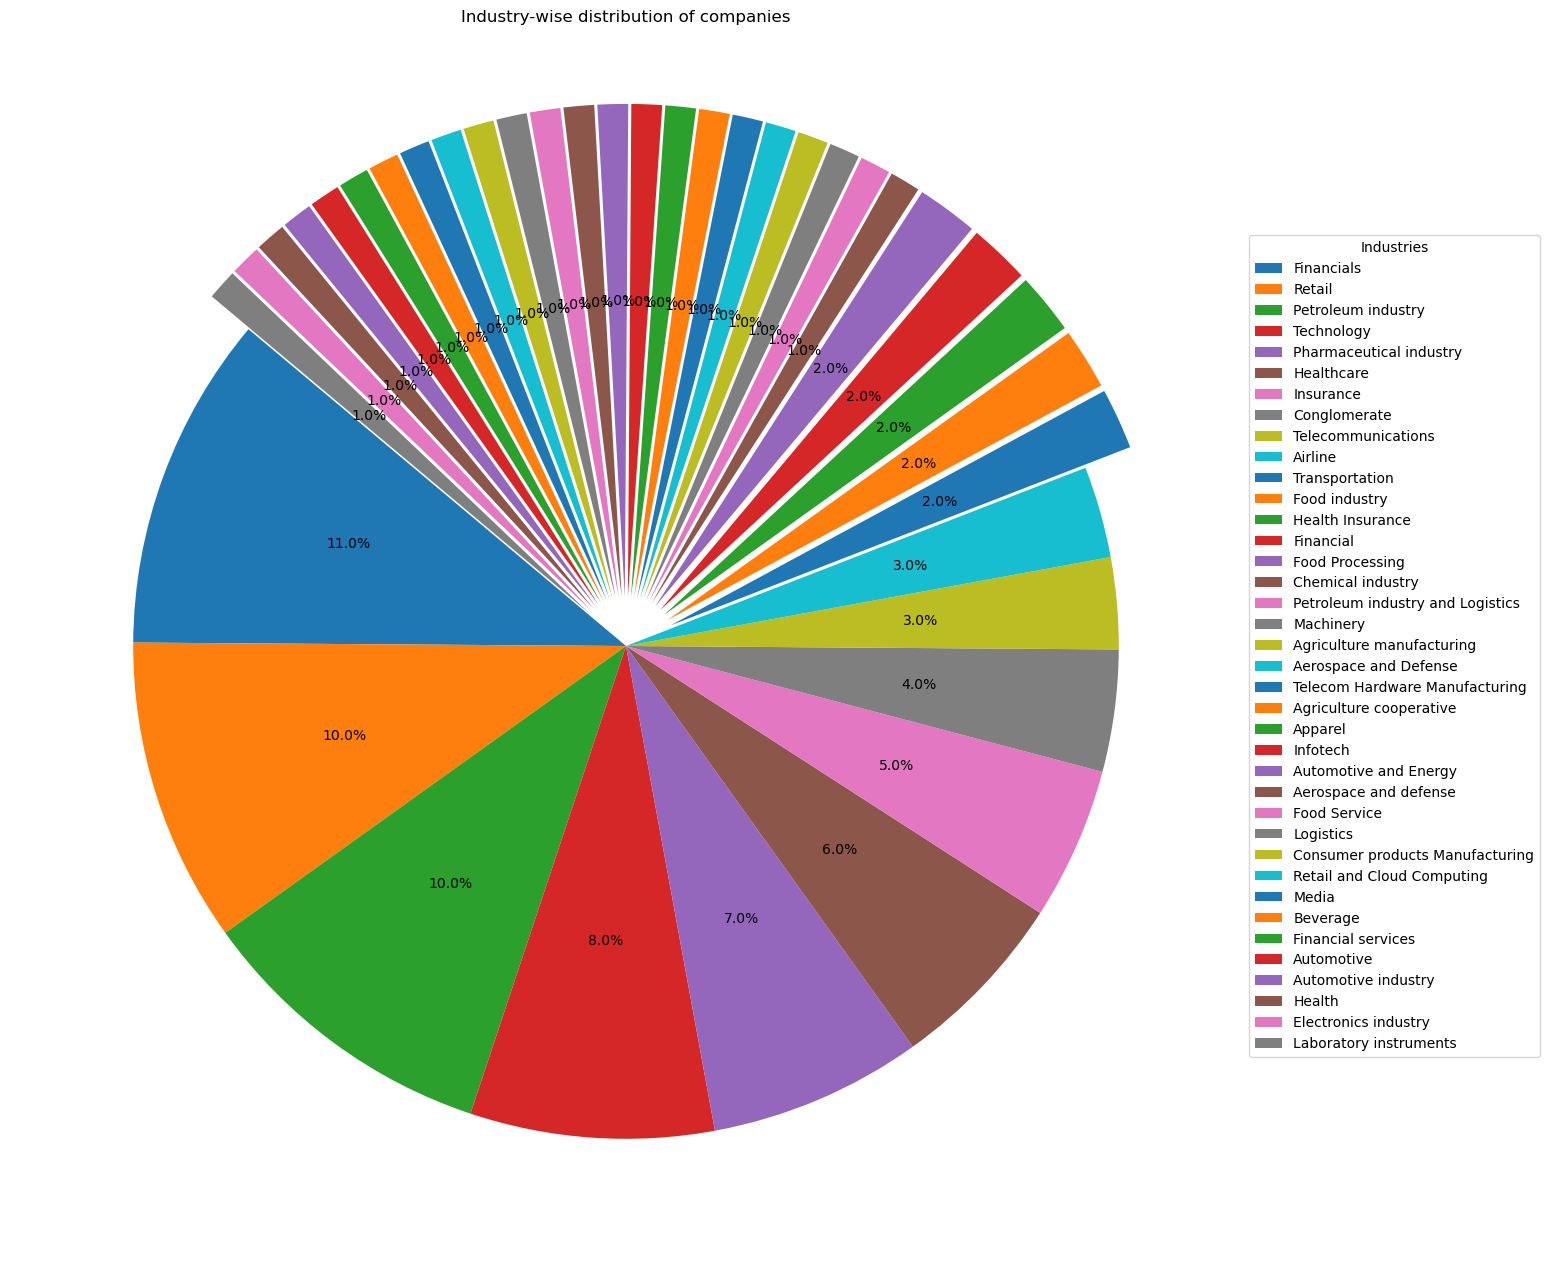

In [109]:
# Get value counts and remove index to not display industry names on slices
counts = data['Industry'].value_counts()
counts.index = ['' for _ in counts.index]

# Custom explode values
explode_values = [0.1 if value < 3 else 0 for value in counts]

plt.figure(figsize=(30, 16))
counts.plot.pie(autopct='%1.1f%%', explode=explode_values, startangle=140)
plt.title('Industry-wise distribution of companies')

# Hide y-label
plt.gca().set_ylabel('')

# Displaying a legend with industry names
plt.legend(
    title="Industries",
    labels=data['Industry'].value_counts().index,  # Display industry names in legend
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

plt.show()




## Conclusions


Based on the visual observations from the various plots and charts, the following conclusions can be derived:

- Correlation Heatmap Observations:

Rank and Revenue Correlation:
There is a strong negative correlation of -0.77 between Rank and Revenue (USD millions). This implies that as the rank of the company decreases, i.e., it moves towards being number one, its revenue tends to increase significantly.
Revenue and Revenue Growth Correlation:
The correlation coefficient between Revenue (USD millions) and Revenue Growth is -0.096, indicating a negligible negative correlation between the two variables. This suggests that companies with higher revenues do not necessarily exhibit higher revenue growth rates, and conversely, companies with lower revenues are not confined to lower growth rates.

- Box Plot Observations:

Healthcare Industry:
The Healthcare industry seems to be leading in revenue, with the median revenue close to 30,000 USD million, suggesting that healthcare companies tend to have higher earning potentials.
Petroleum and Retail Industries:
Followed by the Healthcare industry, the Petroleum and Retail industries also exhibit substantial revenues with medians close to 18,000 and 15,000 USD million, respectively, indicating their substantial presence and earning potentials in the market.

- Histogram Observations:

The histogram, exhibiting a right-skewed distribution, reflects that most companies have revenues clustered around the lower end, with the highest frequency observed at (0, 30) USD million. The gradually decreasing frequencies toward the right suggest that there are fewer companies with extremely high revenues, indicating the presence of outliers or exceptionally high revenue-generating companies.

- Bar Plot Observations:

Top Performers:

Walmart, with a revenue close to 600,000 USD million, stands out as the top revenue-generating company, followed by Amazon with around 500,000 USD million.
Exxon Mobil and Apple are also prominent players, each close to 400,000 USD million in revenue, suggesting their significant market shares and economic impacts.
United Healthcare, with around 340,000 USD million, is another major entity in terms of revenue generation.
Industry Variety:
Observing the variety in industries, such as retail (Walmart and Amazon), petroleum (Exxon Mobil), technology (Apple), and healthcare (United Healthcare) among the top performers, it can be concluded that multiple industries have the potential to yield high revenues, reflecting the diverse nature of the high-revenue-generating market segments.

**Overall Conclusions:**

Diverse Potential: Different industries, like healthcare, petroleum, and retail, have shown the potential to generate high revenues, emphasizing the importance of diversity in the market landscape.
Non-Linear Growth Paths: The negligible correlation between revenue and revenue growth suggests that companies are on non-linear growth paths, and higher initial revenues do not dictate the pace of growth.
Dominant Players: There exist dominant players in various sectors, significantly outperforming their competitors, indicating the presence of monopolistic and oligopolistic market structures in some industries.
Revenue Concentration: The majority of companies are concentrated in the lower revenue brackets, with only a few outliers generating exceptionally high revenues. This concentration implies that there are substantial barriers to entry and growth, leading to revenue disparities.



